In [5]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

#Processamento de Linguagem Natural
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
dataframe_sentimento = pd.read_csv("dataframe_final_candidatos_pronto_para_sentimento.csv")

In [8]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo
0,2022-07-31 22:00:15+00:00,1553863135819431936,@alexandrekalil @LulaOficial Pior de todos os ...,Lula,pior de todos os tempos!
1,2022-07-31 22:00:14+00:00,1553863132363243523,@JanainaDoBrasil Lula será presidente Márcio F...,Lula,lula será presidente márcio frança será senad...
2,2022-07-31 22:00:13+00:00,1553863127997071360,Votarei no @ColetivoGuarnic para deputado esta...,Lula,votarei no para deputado estadual.e vou votar...
3,2022-07-31 22:00:13+00:00,1553863126575087617,Lula fracassa como cabo eleitoral em estados-c...,Lula,lula fracassa como cabo eleitoral em estados-c...
4,2022-07-31 22:00:12+00:00,1553863122645295104,@JornalOGlobo Ele recobrou o juízo. Afinal el...,Lula,ele recobrou o juízo. afinal ele trabalhou c...


In [9]:
analisador_de_texto = SentimentIntensityAnalyzer()

In [10]:
dataframe_sentimento['Sentimentos'] = dataframe_sentimento['Tweet_limpo'].apply(lambda i: analisador_de_texto.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))

In [11]:
dataframe_sentimento.tail()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos
148,2022-07-31 21:55:11+00:00,1553861860461613056,@faornelas @Mindful2022 @hugossouto @cirogomes...,Ciro Gomes,"nossa, parabéns. quero ver o q ele vai fa...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
149,2022-07-31 21:55:09+00:00,1553861850101579779,@Mindful2022 @rital1n0 @hugossouto @cirogomes ...,Ciro Gomes,empalou o petisco! kkkkk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
150,2022-07-31 21:55:07+00:00,1553861841700683776,@kimpaim Ciro Nogueira em convenção do PDT?\nC...,Ciro Gomes,ciro nogueira em convenção do pdt?com cartaz ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
151,2022-07-31 21:55:03+00:00,1553861824667344906,@cirogomes @CartunistaT Totalmente perdido,Ciro Gomes,totalmente perdido,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
152,2022-07-31 21:54:37+00:00,1553861717918187521,@emirsader Calma lá! Existem nomes melhores pa...,Ciro Gomes,calma lá! existem nomes melhores para preside...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [12]:
dataframe_sentimento['Sentimentos']

0      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...
3      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                             ...                        
148    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
149    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
150    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
151    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
152    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimentos, Length: 153, dtype: object

In [13]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['pos'])
dataframe_sentimento['Negativo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neg'])
dataframe_sentimento['Neutro'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neu'])
dataframe_sentimento['Composicao'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['compound'])

In [14]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao
0,2022-07-31 22:00:15+00:00,1553863135819431936,@alexandrekalil @LulaOficial Pior de todos os ...,Lula,pior de todos os tempos!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000
1,2022-07-31 22:00:14+00:00,1553863132363243523,@JanainaDoBrasil Lula será presidente Márcio F...,Lula,lula será presidente márcio frança será senad...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000
2,2022-07-31 22:00:13+00:00,1553863127997071360,Votarei no @ColetivoGuarnic para deputado esta...,Lula,votarei no para deputado estadual.e vou votar...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",0.0,0.095,0.905,-0.296
3,2022-07-31 22:00:13+00:00,1553863126575087617,Lula fracassa como cabo eleitoral em estados-c...,Lula,lula fracassa como cabo eleitoral em estados-c...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000
4,2022-07-31 22:00:12+00:00,1553863122645295104,@JornalOGlobo Ele recobrou o juízo. Afinal el...,Lula,ele recobrou o juízo. afinal ele trabalhou c...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000


In [15]:
sentimento = []

In [16]:
for i in dataframe_sentimento['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')
  

In [17]:
sentimento

['Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Positivo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Negativo',
 'Negativo',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 'Neutro',
 '

In [18]:
dataframe_sentimento['Sentimento_Final'] = sentimento

In [19]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-31 22:00:15+00:00,1553863135819431936,@alexandrekalil @LulaOficial Pior de todos os ...,Lula,pior de todos os tempos!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
1,2022-07-31 22:00:14+00:00,1553863132363243523,@JanainaDoBrasil Lula será presidente Márcio F...,Lula,lula será presidente márcio frança será senad...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
2,2022-07-31 22:00:13+00:00,1553863127997071360,Votarei no @ColetivoGuarnic para deputado esta...,Lula,votarei no para deputado estadual.e vou votar...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",0.0,0.095,0.905,-0.296,Negativo
3,2022-07-31 22:00:13+00:00,1553863126575087617,Lula fracassa como cabo eleitoral em estados-c...,Lula,lula fracassa como cabo eleitoral em estados-c...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
4,2022-07-31 22:00:12+00:00,1553863122645295104,@JornalOGlobo Ele recobrou o juízo. Afinal el...,Lula,ele recobrou o juízo. afinal ele trabalhou c...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro


In [20]:
dataframe_sentimento['Sentimento_Final'].value_counts()

Neutro      121
Negativo     24
Positivo      8
Name: Sentimento_Final, dtype: int64

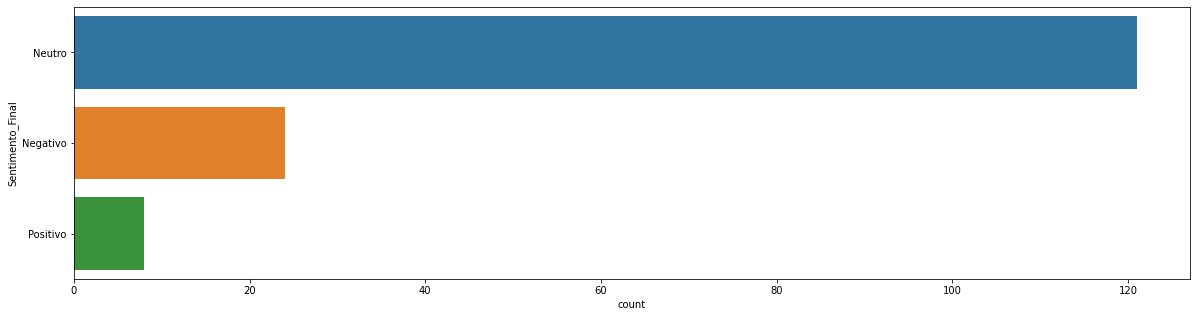

In [21]:
plt.figure(figsize=(20, 5))
sns.countplot(y="Sentimento_Final", data=dataframe_sentimento)

### Lula

In [22]:
resultado_filtro_lula = dataframe_sentimento[dataframe_sentimento['Candidato'] == "Lula"] 

In [23]:
resultado_filtro_lula.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-31 22:00:15+00:00,1553863135819431936,@alexandrekalil @LulaOficial Pior de todos os ...,Lula,pior de todos os tempos!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
1,2022-07-31 22:00:14+00:00,1553863132363243523,@JanainaDoBrasil Lula será presidente Márcio F...,Lula,lula será presidente márcio frança será senad...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
2,2022-07-31 22:00:13+00:00,1553863127997071360,Votarei no @ColetivoGuarnic para deputado esta...,Lula,votarei no para deputado estadual.e vou votar...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",0.0,0.095,0.905,-0.296,Negativo
3,2022-07-31 22:00:13+00:00,1553863126575087617,Lula fracassa como cabo eleitoral em estados-c...,Lula,lula fracassa como cabo eleitoral em estados-c...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
4,2022-07-31 22:00:12+00:00,1553863122645295104,@JornalOGlobo Ele recobrou o juízo. Afinal el...,Lula,ele recobrou o juízo. afinal ele trabalhou c...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro


In [24]:
resultado_filtro_lula['Candidato'].unique()

array(['Lula'], dtype=object)

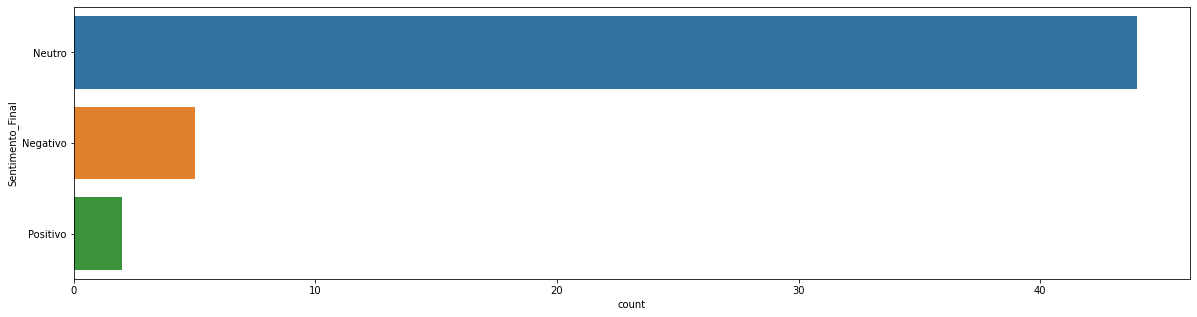

In [25]:
plt.figure(figsize=(20, 5))
sns.countplot(y="Sentimento_Final", data=resultado_filtro_lula)

In [26]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-31 22:00:15+00:00,1553863135819431936,@alexandrekalil @LulaOficial Pior de todos os ...,Lula,pior de todos os tempos!,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
1,2022-07-31 22:00:14+00:00,1553863132363243523,@JanainaDoBrasil Lula será presidente Márcio F...,Lula,lula será presidente márcio frança será senad...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
2,2022-07-31 22:00:13+00:00,1553863127997071360,Votarei no @ColetivoGuarnic para deputado esta...,Lula,votarei no para deputado estadual.e vou votar...,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",0.0,0.095,0.905,-0.296,Negativo
3,2022-07-31 22:00:13+00:00,1553863126575087617,Lula fracassa como cabo eleitoral em estados-c...,Lula,lula fracassa como cabo eleitoral em estados-c...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro
4,2022-07-31 22:00:12+00:00,1553863122645295104,@JornalOGlobo Ele recobrou o juízo. Afinal el...,Lula,ele recobrou o juízo. afinal ele trabalhou c...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.000,1.000,0.000,Neutro


In [27]:
dataframe_final = dataframe_sentimento[["Data_Hora", "IdTweet", "Tweet", "Candidato", "Tweet_limpo", "Sentimento_Final"]]

In [28]:
dataframe_final.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento_Final
0,2022-07-31 22:00:15+00:00,1553863135819431936,@alexandrekalil @LulaOficial Pior de todos os ...,Lula,pior de todos os tempos!,Neutro
1,2022-07-31 22:00:14+00:00,1553863132363243523,@JanainaDoBrasil Lula será presidente Márcio F...,Lula,lula será presidente márcio frança será senad...,Neutro
2,2022-07-31 22:00:13+00:00,1553863127997071360,Votarei no @ColetivoGuarnic para deputado esta...,Lula,votarei no para deputado estadual.e vou votar...,Negativo
3,2022-07-31 22:00:13+00:00,1553863126575087617,Lula fracassa como cabo eleitoral em estados-c...,Lula,lula fracassa como cabo eleitoral em estados-c...,Neutro
4,2022-07-31 22:00:12+00:00,1553863122645295104,@JornalOGlobo Ele recobrou o juízo. Afinal el...,Lula,ele recobrou o juízo. afinal ele trabalhou c...,Neutro


In [29]:
dataframe_final.to_csv('dataframe_final.csv', sep=',', index=False)